# 1.Downloaded Heberman Dataset from kaggle.
# 2.Performed basic analysis as below points
    1. Highlevel statistics of datasets - no of features,no of points,no of classes and data points per class.
    2. Explained our objective.
    3. Performed Univariate analysis(PDF,CDF,Box plot and violin plots) to find which feature is useful for Classification.
    4. Performed Bi-variate analysis(Scatter plot and pair plots) to find combinations of features is useful for classification
    5. 

## Import modules



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load csv file

df = pd.read_csv (r"F:\haberman.csv")

In [4]:
df

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [5]:
# here we will be getting no of rows and columns ie., 306 rows amd 4 columns
# how many data points and features

df.shape



(306, 4)

In [6]:
# checking column names 

df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [7]:
df.rename(columns = {'age':'Age','year':'Year_of_operations','nodes':'Auxiliary_nodes','status':'Survival_status'},inplace = True)

In [8]:
df.describe()

,Age,Year_of_operations,Auxiliary_nodes,Survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [9]:
df

,Age,Year_of_operations,Auxiliary_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [10]:
df['Survival_status'].value_counts()

1    225
2     81
Name: Survival_status, dtype: int64

# Univatiate Analysis

# 1.PDF

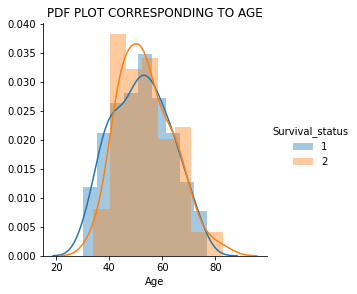

In [11]:
sns.FacetGrid(df, hue = 'Survival_status', size = 4).map(sns.distplot,'Age').add_legend();
plt.title('PDF PLOT CORRESPONDING TO AGE')
plt.show()


In [12]:

#blue part represents survival  status 1 and orange represents survival status 2
# It shows that people between age 40 to 80 are likely to die.
# people with age less than 35 are likely to survive.

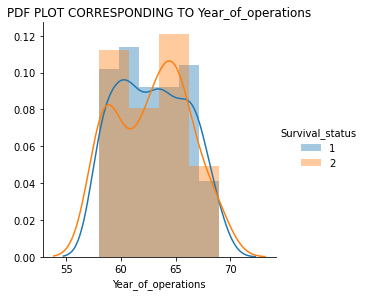

In [13]:
sns.FacetGrid(df, hue = 'Survival_status', size = 4).map(sns.distplot,'Year_of_operations').add_legend();
plt.title('PDF PLOT CORRESPONDING TO Year_of_operations')
plt.show()

In [14]:
# from the above histogram both are overlapping eachother.
# it is stating that people from age 57 and 67 are likely to die.


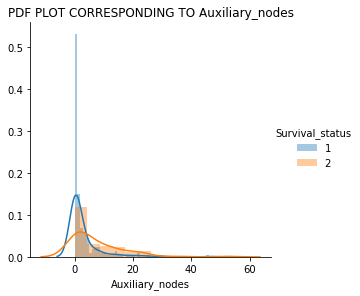

In [15]:
sns.FacetGrid(df, hue = 'Survival_status', size = 4).map(sns.distplot,'Auxiliary_nodes').add_legend();
plt.title('PDF PLOT CORRESPONDING TO Auxiliary_nodes')
plt.show()

In [16]:
# patitents with axil node zero will survive as per the above plot.

# CDF

In [17]:
one = df.loc[df['Survival_status'] == 1]# patient will survive
two = df.loc[df['Survival_status'] == 2]# patient will Die

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


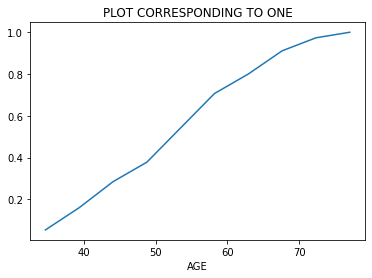

In [18]:
counts,bin_edges = np.histogram(one['Age'],bins = 10, density = True)
PDF = counts/(sum(counts))
print(PDF)
print(bin_edges)


CDF = np.cumsum(PDF)

plt.plot(bin_edges[1:],CDF, label = 'CDF')
plt.xlabel('AGE')
plt.title('PLOT CORRESPONDING TO ONE')
plt.show()

In [19]:
 # As we are doing this for status 1 ie., its clear that patients age between 40 to 60 had greater survival.
# 90% of patients is having greater survival with age below 70

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


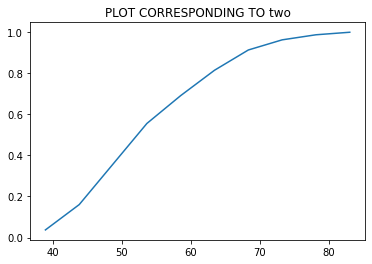

In [20]:
counts,bin_edges = np.histogram(two['Age'],bins = 10, density = True)
PDF = counts/(sum(counts))
print(PDF)
print(bin_edges)


CDF = np.cumsum(PDF)

plt.plot(bin_edges[1:],CDF,label = 'CDF')
plt.title('PLOT CORRESPONDING TO two')
plt.show()

In [21]:
# 74% of the patients with age greater than 55 and  less than 80 is having death rate high.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


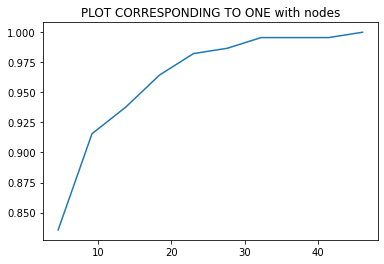

In [22]:
counts,bin_edges = np.histogram(one['Auxiliary_nodes'],bins = 10, density = True)
PDF = counts/(sum(counts))
print(PDF)
print(bin_edges)


CDF = np.cumsum(PDF)

plt.plot(bin_edges[1:],CDF,label = 'CDF')
plt.title('PLOT CORRESPONDING TO ONE with nodes')
plt.show()

In [23]:
# From the above plot, it is clear that about 85% of patients having surivval rate with auxilary_nodes less than 10.

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


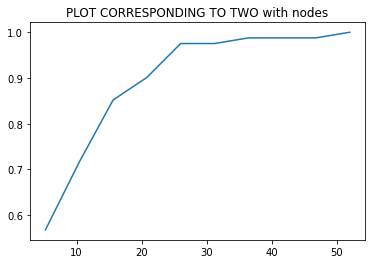

In [24]:
counts,bin_edges = np.histogram(two['Auxiliary_nodes'],bins = 10, density = True)
PDF = counts/(sum(counts))
print(PDF)
print(bin_edges)


CDF = np.cumsum(PDF)

plt.plot(bin_edges[1:],CDF,label = 'CDF')
plt.title('PLOT CORRESPONDING TO TWO with nodes')
plt.show()

In [26]:
# it is observed that 96% of patients who died within 5 years of surgery is having acel nodes less than or equal to 28.

# Box plot

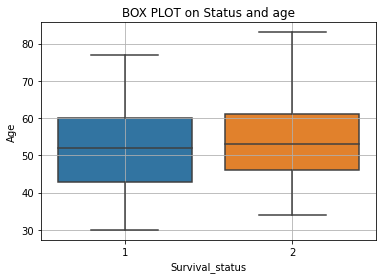

In [27]:
sns.boxplot(x='Survival_status',y='Age',data=df)
plt.grid()
plt.title('BOX PLOT on Status and age')
plt.show()

In [28]:
# From the plot both are overlapping eachother.
# Hence age feature is not sufficient to get the exact sceanerio.

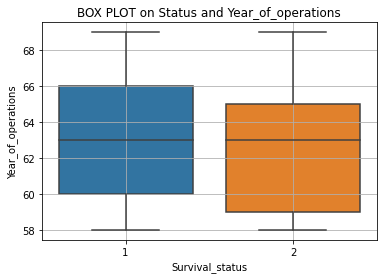

In [30]:
sns.boxplot(x='Survival_status',y='Year_of_operations',data=df)
plt.grid()
plt.title('BOX PLOT on Status and Year_of_operations')
plt.show()

In [31]:
# From the plot both are overlapping eachother.
# Hence Year_of_operations feature is not sufficient to get the exact sceanerio.

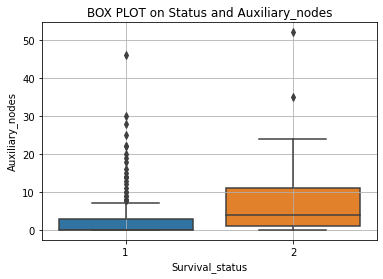

In [32]:
sns.boxplot(x='Survival_status',y='Auxiliary_nodes',data=df)
plt.grid()
plt.title('BOX PLOT on Status and Auxiliary_nodes')
plt.show()

In [33]:
# From the above plot, In ONE we have more outliers and it has auxilary nodes less than 3.


# VIOLIN PLOT

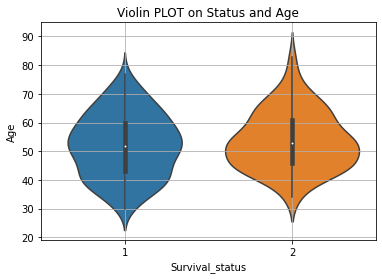

In [40]:
sns.violinplot(x='Survival_status',y='Age',data=df)
plt.grid()
plt.title('Violin PLOT on Status and Age')
plt.show()

In [41]:
# From the above plot both are overlapping with eachother.
# Age feature is not sufficient to get the desired output.

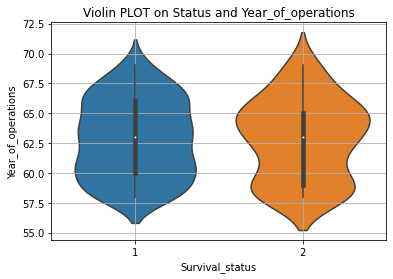

In [42]:
sns.violinplot(x='Survival_status',y='Year_of_operations',data=df)
plt.grid()
plt.title('Violin PLOT on Status and Year_of_operations')
plt.show()

In [43]:
# From the above plot both are overlapping with eachother.
# Year_of_operations feature is not sufficient to get the desired output.

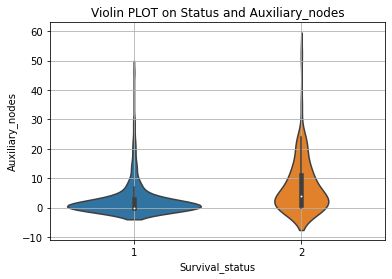

In [44]:
sns.violinplot(x='Survival_status',y='Auxiliary_nodes',data=df)
plt.grid()
plt.title('Violin PLOT on Status and Auxiliary_nodes')
plt.show()

In [45]:
# From the above plot, the survival status ie., patient having axil node 0, patients will survive.
# Patients who have died are having axil node grateer than or equal to 1.

# Bi-Variate Analysis

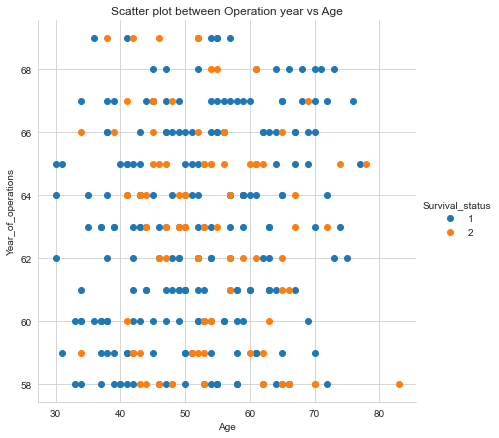

In [50]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Survival_status',size = 6).map(plt.scatter,'Age','Year_of_operations').add_legend();
plt.title('Scatter plot between Operation year vs Age')
plt.show()

In [52]:
# As we can see there is huge overlap for both class 1 and 2 we cannot classify this by age and years of operation.

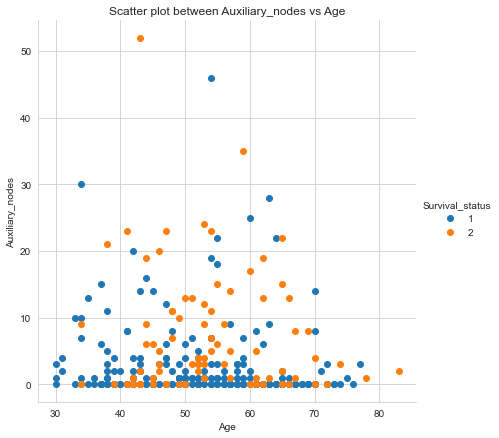

In [51]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Survival_status',size = 6).map(plt.scatter,'Age','Auxiliary_nodes').add_legend();
plt.title('Scatter plot between Auxiliary_nodes vs Age')
plt.show()

In [53]:
# As we can see there is huge overlap for both class 1 and 2 we cannot classify this by age and Auxiliary_nodes.

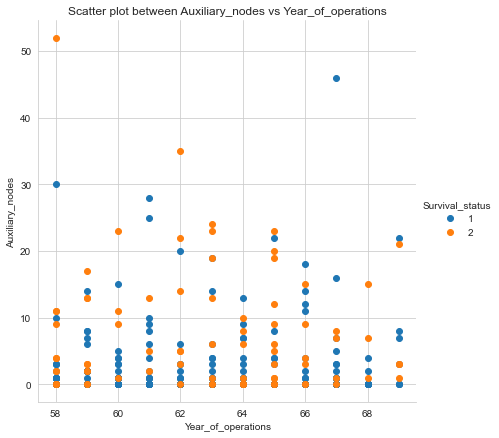

In [54]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Survival_status',size = 6).map(plt.scatter,'Year_of_operations','Auxiliary_nodes').add_legend();
plt.title('Scatter plot between Auxiliary_nodes vs Year_of_operations')
plt.show()

In [55]:
# As we can see there is huge overlap for both class 1 and 2 we cannot classify this by year of operaion and Auxiliary_nodes.

# Pair Plot

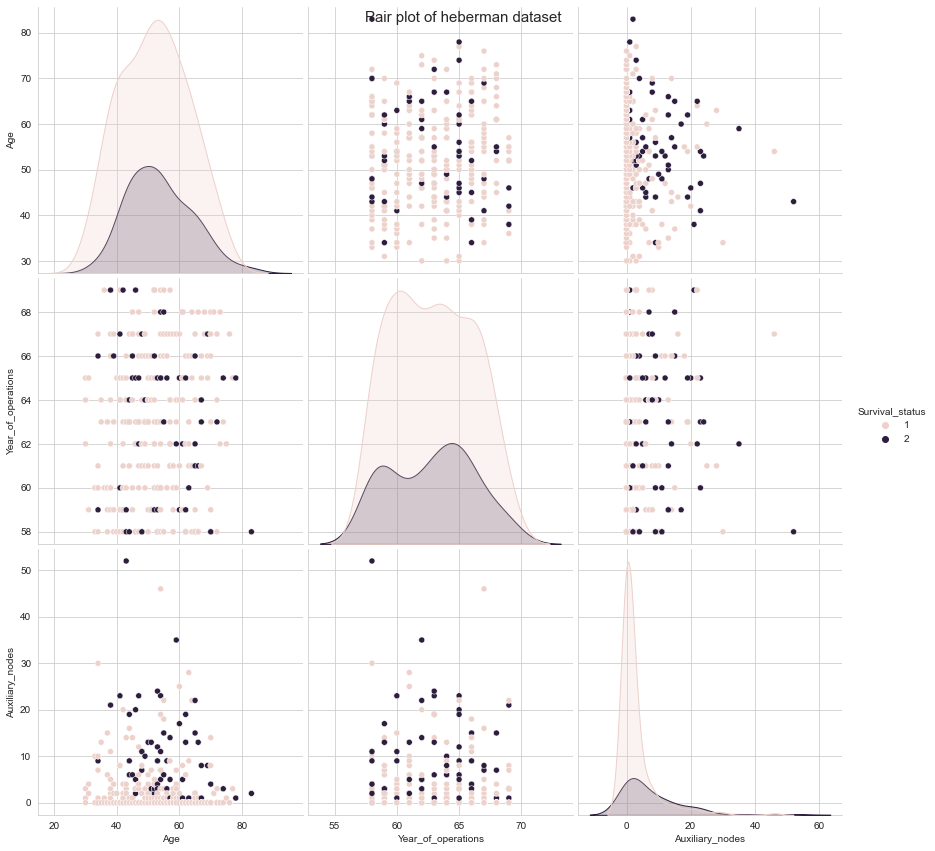

In [63]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df,hue='Survival_status',x_vars = ['Age','Year_of_operations','Auxiliary_nodes'],y_vars = ['Age','Year_of_operations','Auxiliary_nodes'],size=4);
plt.suptitle('Pair plot of heberman dataset',size = 15);
plt.show()

In [ ]:
# Conclusion

# 1. It is clear that all the data points were operlapping with eachother. So it is not possible to predict based on Age,years and nodes.

# 2. These two classes of status are linearly inseparable due to overlapping.

# 3. We need to collect more features which are helpful in predicting the survival status of patients.

# 4. axil_nodes are more useful than rest.

# 5. order ( axil_nodes -> years of operation -> age)